In [6]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2) # 데이터를 2등분으로 나눈다. 

print(kf.get_n_splits(X))
print(kf)

2
KFold(n_splits=2, random_state=None, shuffle=False)


In [4]:
X

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [5]:
y

array([1, 2, 3, 4])

In [7]:
for train_idx, test_idx in kf.split(X):
    print('--- idx')
    print(train_idx, test_idx)
    print('--- train data')
    print(X[train_idx])
    print('--- val data')
    print(X[test_idx])

--- idx
[2 3] [0 1]
--- train data
[[1 2]
 [3 4]]
--- val data
[[1 2]
 [3 4]]
--- idx
[0 1] [2 3]
--- train data
[[1 2]
 [3 4]]
--- val data
[[1 2]
 [3 4]]


In [8]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

In [9]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X =wine.drop(['taste', 'quality'], axis=1)  
y = wine['taste']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))


Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


In [11]:
# KFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

In [12]:
for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


In [13]:
# 모델의 성능이 각각 다르다는 것을 확인 

cv_accracy = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]  # iloc 를 사용해서 train 진행 
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accracy.append(accuracy_score(y_test, pred))

cv_accracy



[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

In [14]:
np.mean(cv_accracy)

0.709578255462782

In [16]:
# StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv =DecisionTreeClassifier(max_depth=2, random_state=13)

cv_accracy = []

for train_idx, test_idx in skfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accracy.append(accuracy_score(y_test, pred))
cv_accracy

[0.5523076923076923,
 0.6884615384615385,
 0.7143956889915319,
 0.7321016166281755,
 0.7567359507313318]

In [17]:
np.mean(cv_accracy)

0.6888004974240539

In [18]:
# cross validation을 보다 간편히 
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_val_score(wine_tree_cv, X, y, scoring=None, cv=skfold)

array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595])

In [13]:
wine_tree_cv = DecisionTreeClassifier(max_depth=5, random_state=13)

cross_val_score(wine_tree_cv, X, y, scoring=None, cv=skfold)

array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772])

In [19]:
def skfold_dt(depth):
    from sklearn.model_selection import cross_val_score

    skfold = StratifiedKFold(n_splits=5)
    wine_tree_cv = DecisionTreeClassifier(max_depth=depth, random_state=13)

    print(cross_val_score(wine_tree_cv, X, y, scoring=None, cv=skfold))

In [20]:
skfold_dt(3)

[0.56846154 0.68846154 0.71439569 0.73210162 0.75673595]


In [14]:
# train score를 함께 보려면 
from sklearn.model_selection import cross_validate
cross_validate(wine_tree_cv, X, y, scoring=None, cv=skfold, return_train_score=True )

{'fit_time': array([0.02700138, 0.03198934, 0.03300738, 0.04098487, 0.03999352]),
 'score_time': array([0.00300121, 0.00300264, 0.00600529, 0.01100039, 0.00300312]),
 'test_score': array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772]),
 'train_score': array([0.78795459, 0.78045026, 0.77568295, 0.76356291, 0.76279338])}

In [21]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X =wine.drop(['taste', 'quality'], axis=1)  
y = wine['taste']

In [22]:
# GridSearch : 결정나무 모델의 하이퍼파라미터를 수정
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : [2, 4, 7, 10]}  # dic 형태로 초기화
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)  # cv : cross validstion
gridsearch.fit(X, y)  # trainsplit  기능을 쓸 필요가 없다 gridsearch가 자동으로 적용해 줌 

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

In [23]:
# gridSearch 결과 확인 
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.01740074, 0.02119355, 0.03240013, 0.04279528]),
    'mean_score_time': array([0.00439825, 0.00300379, 0.00320048, 0.00260162]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.64401587]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4]),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.66743649]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.72517321]),
    'std

In [24]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

In [25]:
gridsearch.best_score_

0.6888004974240539

In [26]:
gridsearch.best_params_

{'max_depth': 2}

In [27]:
# 파이프라인을 적용한 모델에 GridSearch 적용 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=13))]

pipe = Pipeline(estimators)

In [28]:
param_grid = [ {'clf__max_depth' : [2, 4, 7, 10]}]

GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [29]:
GridSearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [30]:
GridSearch.best_score_

0.6888004974240539

In [31]:
GridSearch.cv_results_

{'mean_fit_time': array([0.02060409, 0.02239118, 0.04219804, 0.0463975 ]),
 'std_fit_time': array([0.00580136, 0.0028051 , 0.01132435, 0.001856  ]),
 'mean_score_time': array([0.00380535, 0.00300775, 0.00340199, 0.00280228]),
 'std_score_time': array([0.00132604, 0.00090202, 0.0010204 , 0.00040027]),
 'param_clf__max_depth': masked_array(data=[2, 4, 7, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 2},
  {'clf__max_depth': 4},
  {'clf__max_depth': 7},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
 'split1_test_score': array([0.68846154, 0.63153846, 0.60461538, 0.60230769]),
 'split2_test_score': array([0.71439569, 0.72363356, 0.68206313, 0.66589684]),
 'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
 'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.72517321]),
 'mean_test_score': array([0.688

## gridsearch를 plot_tree로 표현하는 코드 수정

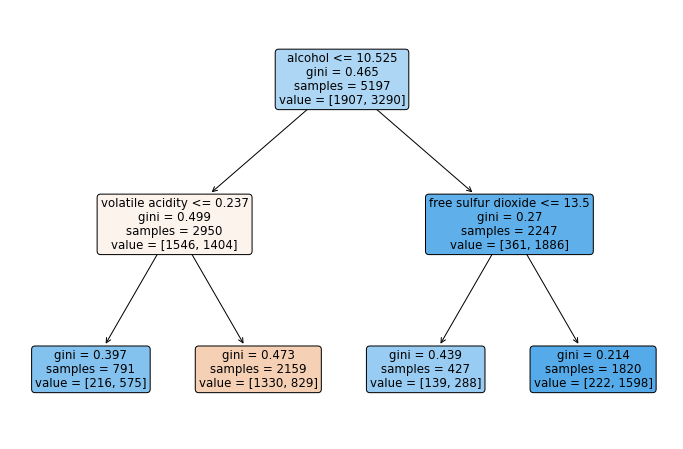

In [33]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(wine_tree, feature_names=X.columns, rounded=True, filled=True);

In [ ]:
import pandas as pd 

score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]